In [1]:
import numpy as np
#import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from setup import *
#from FullFrame import FullFrame
from Binning_Model import BinFunc


##--------------------------------------------------------------------------##
##             NECESSARY USER INPUTS BELOW....                              ##
##--------------------------------------------------------------------------##

##################
###   WASP4b   ###
##################
#obs_date='ut20150819'                           #observation date
#obj_name='Wasp4'                                #object name   
#midtime=['2015-08-19T07:43:00.00']                 #time of midtransit, WAsp-4b

###################
###   WASP52b   ###
###################
obs_date='ut20160811'
#obs_date='ut20160922'
obj_name='Wasp52'

midtime=['2016-08-11T04:51:00']               #time of midtransit, Wasp-52b, Transit1
#midtime=['2016-09-22T04:44:00']               #time of midtransit, Wasp-52b, Transit2

##################
###   Hats8b   ###
##################
#obs_date='ut20170723'                           #observation date
#obs_date='ut20170828'
#obj_name='Hats8'                                #object name  

#midtime=['2017-07-24T05:28:01.056']                 #time of midtransit, Hats-8b, Transit 1
#midtime=['2017-08-29T01:36:04.608']                 #time of midtransit, Hats-8b Transit 2


path='/Volumes/ermay_ext/Magellan/'+obs_date+'/'
data_path=path+obj_name+'_Spec/'      #path to where your data is saved
flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH=path+'SaveData_'+obj_name+'/'

wavelength_path=path+'WaveSolution/'



extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask


binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn

2048 4096


In [12]:
bin_width=50
bin_ctr=np.load(SAVEPATH+'LC_bins_'+str(int(bin_width))+'.npz')['bin_ctr']
print bin_ctr
n_bins=len(bin_ctr)
width=bin_ctr[1]-bin_ctr[0]
start=bin_ctr[0]-width/2
end=bin_ctr[-1]+width/2
print start,end,width,n_bins

[4425. 4475. 4525. 4575. 4625. 4675. 4725. 4775. 4825. 4875. 4925. 4975.
 5025. 5075. 5125. 5175. 5225. 5275. 5325. 5375. 5425. 5475. 5525. 5575.
 5625. 5675. 5725. 5775. 5825. 5875. 5925. 5975. 6025. 6075. 6125. 6175.
 6225. 6275. 6325. 6375. 6425. 6475. 6525. 6575. 6625. 6675. 6725. 6775.
 6825. 6875. 6925. 6975. 7025. 7075. 7125. 7175. 7225. 7275. 7325. 7375.
 7425. 7475. 7525. 7575. 7625. 7675. 7725. 7775. 7825. 7875. 7925. 7975.]
4400.0 8000.0 50.0 72


In [13]:
ShiftSpec=np.load(SAVEPATH+'ShiftedSpec_All.npz')
FlatSpec=np.load(SAVEPATH+'FlattenedSpectra.npz')

#spec=ShiftSpec['data']
wave=ShiftSpec['wave']
print wave.shape
#pixs=ShiftSpec['pixels']
ysft=ShiftSpec['yshift']
print ysft.shape

#fwhm=FlatSpec['fwhm_av']
gaus=FlatSpec['gaus_params']  #1=x-shift
bkgd=FlatSpec['bkgd_params']  #1=bg counts
#phte=FlatSpec['pht_err']

print gaus.shape
print bkgd.shape

n_exp=wave.shape[1]

(9, 145, 8249)
(9, 145)
(9, 145, 8249, 4)
(9, 145, 8249, 2)


In [14]:
waves0=np.fliplr(wave[0,:,:])
ys0=ysft[0,:]
xs0=np.fliplr(gaus[0,:,:,1])
bg0=np.fliplr(bkgd[0,:,:,1])
print waves0.shape

#white_x=np.empty([n_exp])*np.nan
#white_y=np.empty([n_exp])*np.nan
#white_bg=np.empty([n_exp])*np.nan


binned_x=np.empty([n_exp,n_bins])*np.nan
binned_y=np.empty([n_exp,n_bins])*np.nan
binned_bg=np.empty([n_exp,n_bins])*np.nan


print start,end,width
__,white_x=BinFunc(xs0,waves0,start,end,end-start,True)
#__,white_y=BinFunc(xs0,waves0,start,end,end-width,True)
__,white_bg=BinFunc(bg0,waves0,start,end,end-start,True)

__,binned_x=BinFunc(xs0,waves0,start,end,width,True)
#__,white_y=BinFunc(xs0,waves0,start,end,end-width,True)
__,binned_bg=BinFunc(bg0,waves0,start,end,width,True)

(145, 8249)
4400.0 8000.0 50.0


/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
Binning_Model.py:52: RuntimeWarning: invalid value encountered in multiply
  bin_cnt=np.empty([n_exp,numbins])*np.nan


[85.1713017]


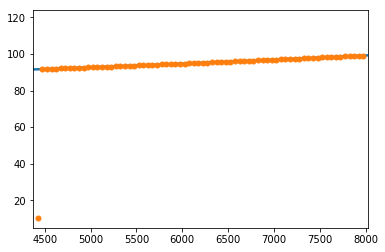

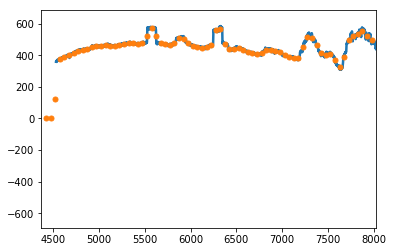

In [15]:

print white_x[0,:]

plt.plot(waves0[0,:],xs0[0,:],linewidth=2.5)
plt.plot(bin_ctr,binned_x[0,:],'.',markersize=10)
plt.xlim(bin_ctr[0]-width,bin_ctr[-1]+width)
plt.show()

plt.clf()

plt.plot(waves0[0,:],bg0[0,:],linewidth=2.5)
plt.plot(bin_ctr,binned_bg[0,:],'.',markersize=10)
plt.xlim(bin_ctr[0]-width,bin_ctr[-1]+width)
plt.show()

In [16]:
np.savez_compressed(SAVEPATH+'NoiseModel_Inputs_'+str(int(bin_width))+'.npz',white_x=white_x[:,0],white_bg=white_bg[:,0],
                   binned_x=binned_x,binned_bg=binned_bg, yshift=ys0)


In [18]:
print white_x[:,0].shape
print binned_x.shape
print ys0.shape

(145,)
(145, 18)
(145,)
